## Processing k6 results

In [1]:
import json
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import sys
import os
from importlib import reload # reload 

sys.path.append('../common')
import requestTimeUtils
import utils

reload(requestTimeUtils)

SETUP_PATH = '../common/setup.json'
f = open(SETUP_PATH)
data = json.load(f)

In [2]:

dir = utils.get_last_result_dir(test_result_base_dir=data["test_result_base_dir"])
print(dir)
apps_dfs, framework_names, apps_durations_dfs = requestTimeUtils.load_data(dir=dir, apps=data['apps'])

out/out_2024-06-01_15-54-34


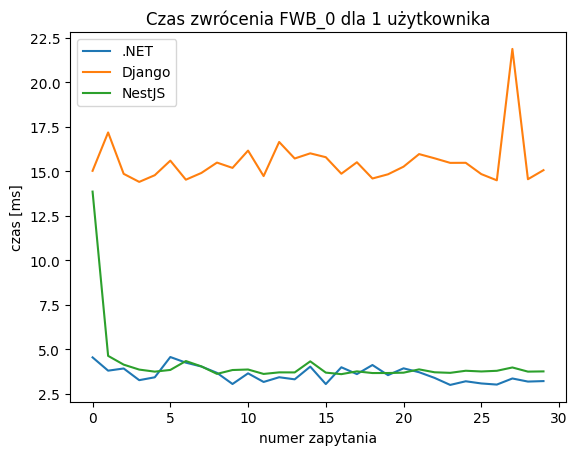

In [29]:
requestTimeUtils.draw_timeline(
    framework_names=framework_names, 
    apps_dfs=apps_dfs, 
    title=f'Czas zwrócenia FWB_0 dla 1 użytkownika'
    )

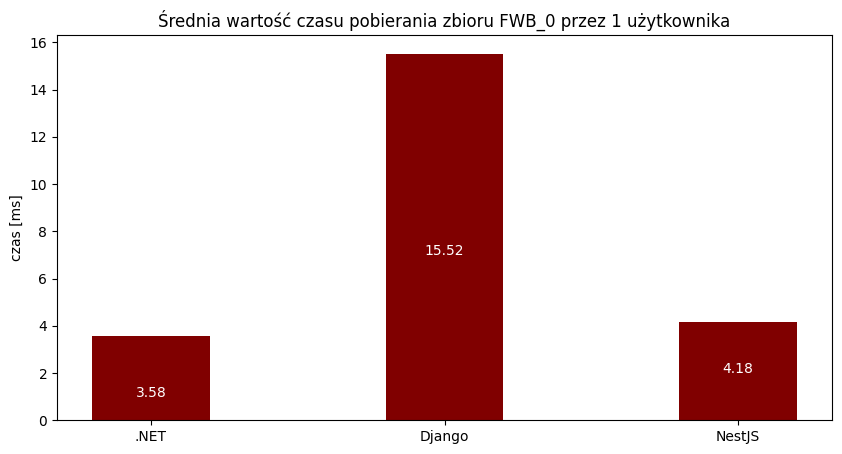

In [32]:
requestTimeUtils.draw_avg_duration(
    framework_names = list(map(lambda x: x['name'], data["apps"].values())),
    mean_durations = [apps_durations_df.mean() for apps_durations_df in apps_durations_dfs],
    title = "Średnia wartość czasu pobierania zbioru FWB_0 przez 1 użytkownika"
)

### Statistics about duration

In [11]:
for idx in range(len(framework_names)):
    print(f'\n{framework_names[idx]}:')
    df = pd.DataFrame(apps_dfs[idx])
    df_1 = df.loc[(df['metric_name'] == 'http_req_duration')][:]
    df_1 = df_1.reset_index(drop=True)
    duration = df_1['metric_value']
    print(duration.describe())


.NET:
count    30.000000
mean      3.583862
std       0.451300
min       2.998168
25%       3.205611
50%       3.488682
75%       3.928522
max       4.565789
Name: metric_value, dtype: float64

Django:
count    30.000000
mean     15.519938
std       1.370815
min      14.405789
25%      14.835335
50%      15.226789
75%      15.727584
max      21.877117
Name: metric_value, dtype: float64

NestJS:
count    30.000000
mean      4.175505
std       1.844684
min       3.603128
25%       3.692254
50%       3.759289
75%       3.869640
max      13.860704
Name: metric_value, dtype: float64


Text(0.5, 1.0, 'Quantity of records for .NET with 1 user')

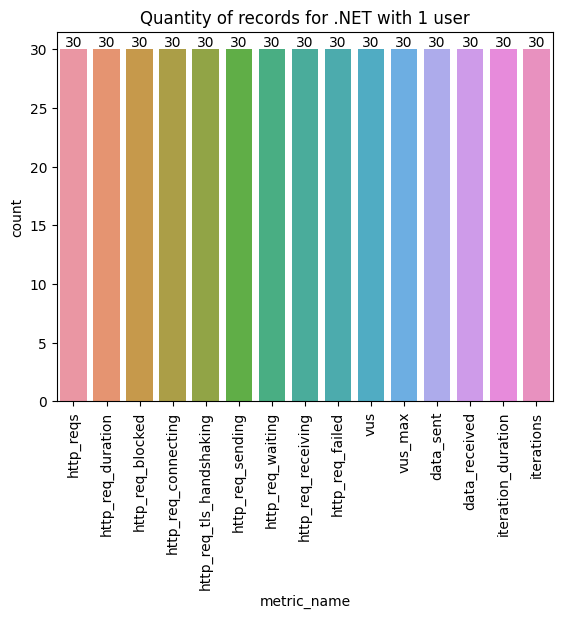

In [8]:
index = 0
fw = data["apps"][list(data["apps"].keys())[index]]
df = fw['df']

chart = sns.countplot(data=df, x='metric_name')
chart.set_xticklabels(chart.get_xticklabels(), rotation=90)
chart.bar_label(chart.containers[0])
chart.set_title(f'Quantity of records for {fw["name"]} with {data["vus"]} {"users" if data["vus"] > 1 else "user"}')


Text(0.5, 1.0, 'Quantity of records for Django with 1 user')

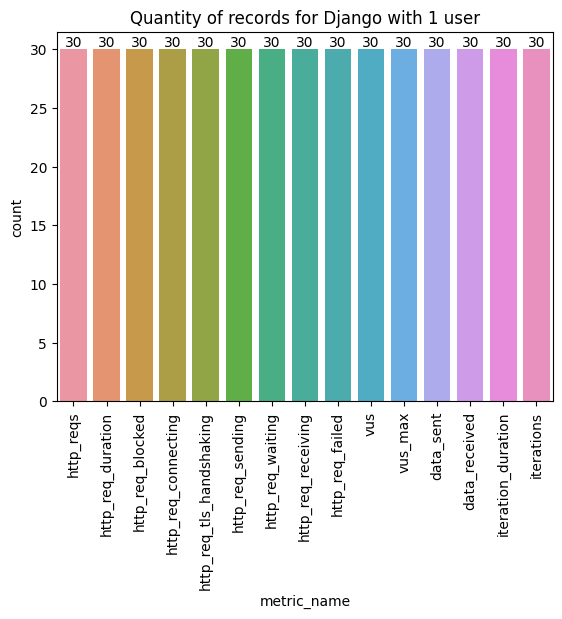

In [9]:
index = 1
fw = data["apps"][list(data["apps"].keys())[index]]
df = fw['df']
chart = sns.countplot(data=df, x='metric_name')
chart.set_xticklabels(chart.get_xticklabels(), rotation=90)
chart.bar_label(chart.containers[0])
chart.set_title(f'Quantity of records for {fw["name"]} with {data["vus"]} {"users" if data["vus"] > 1 else "user"}')

Text(0.5, 1.0, 'Quantity of records for NestJS with 1 user')

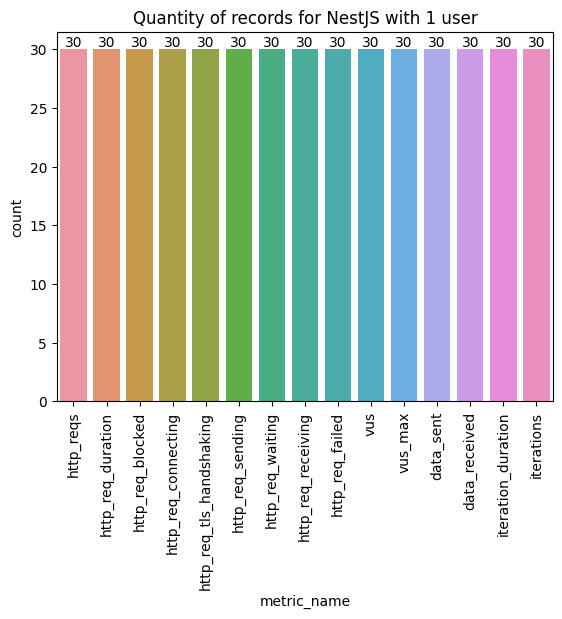

In [10]:
index = 2
fw = data["apps"][list(data["apps"].keys())[index]]
df = fw['df']
chart = sns.countplot(data=df, x='metric_name')
chart.set_xticklabels(chart.get_xticklabels(), rotation=90)
chart.bar_label(chart.containers[0])
chart.set_title(f'Quantity of records for {fw["name"]} with {data["vus"]} {"users" if data["vus"] > 1 else "user"}')